In [1]:
import pandas as pd
import numpy as np

In [2]:
mcdonalds=pd.read_csv("mcdonalds.csv")

In [3]:
print(mcdonalds.shape)


(1453, 15)


In [4]:
# Select the first 11 columns for segmentation variables
x = mcdonalds.iloc[:, 0:11]

# Convert 'Yes' to 1 and 'No' to 0
x_binary = (x == 'Yes').astype(int)

# Check the column-wise means
print(x_binary.mean().round(2))
     

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [5]:
mcdonalds = mcdonalds.replace({"Yes": 1, "No": 0})

C:\Users\91789\AppData\Local\Temp\ipykernel_37140\1963393655.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mcdonalds = mcdonalds.replace({"Yes": 1, "No": 0})


In [6]:
mcdonalds.head()


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [7]:
df1 = mcdonalds.iloc[:, :11]
temp = df1.mean().round(2)
temp

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

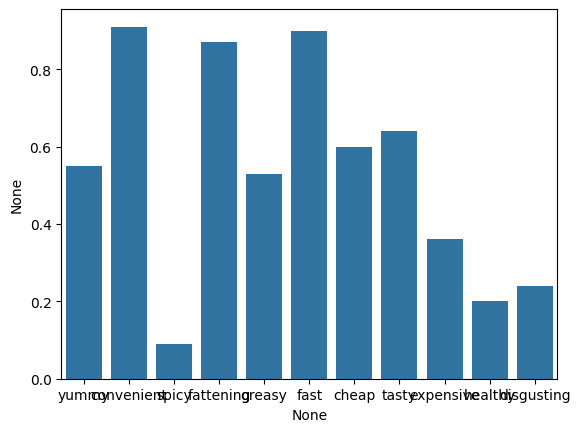

In [9]:
import seaborn as sns
sns.barplot(x=temp.index, y=temp);

In [10]:
from sklearn.decomposition import PCA

pca = PCA()
MD_pca = pca.fit(x_binary)

# Explained variance ratio
import numpy as np
explained_variance = np.round(pca.explained_variance_ratio_, 4)
cumulative_variance = np.round(np.cumsum(explained_variance), 4)

for i, (ev, cv) in enumerate(zip(explained_variance, cumulative_variance), 1):
    print(f"PC{i}: {ev} (Cumulative: {cv})")

PC1: 0.2994 (Cumulative: 0.2994)
PC2: 0.1928 (Cumulative: 0.4922)
PC3: 0.133 (Cumulative: 0.6252)
PC4: 0.0831 (Cumulative: 0.7083)
PC5: 0.0595 (Cumulative: 0.7678)
PC6: 0.0503 (Cumulative: 0.8181)
PC7: 0.0438 (Cumulative: 0.8619)
PC8: 0.0395 (Cumulative: 0.9014)
PC9: 0.0368 (Cumulative: 0.9382)
PC10: 0.0324 (Cumulative: 0.9706)
PC11: 0.0293 (Cumulative: 0.9999)


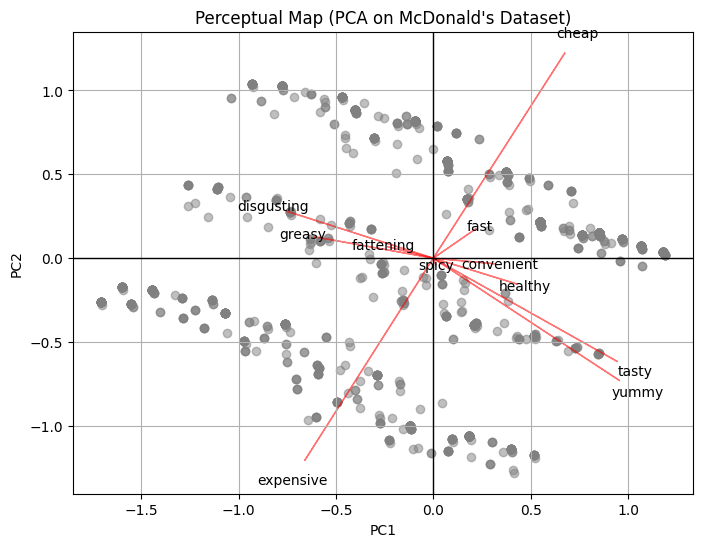

In [11]:
import matplotlib.pyplot as plt
loadings = pd.DataFrame(pca.components_.T,
                        columns=[f'PC{i+1}' for i in range(pca.n_components_)],
                        index=x_binary.columns)

# Project data into PC space
MD_scores = pca.transform(x_binary)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(MD_scores[:, 0], MD_scores[:, 1], color='grey', alpha=0.5)

# Plot the variable vectors (loadings)
for i in range(loadings.shape[0]):
    plt.arrow(0, 0,
              loadings.iloc[i, 0]*2,
              loadings.iloc[i, 1]*2,
              color='red', alpha=0.5)
    plt.text(loadings.iloc[i, 0]*2.2,
             loadings.iloc[i, 1]*2.2,
             loadings.index[i],
             color='black', ha='center', va='center')

plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Perceptual Map (PCA on McDonald's Dataset)")
plt.grid(True)
plt.show()
     


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df2 = scaler.fit_transform(df1)

df2 = pca.fit_transform(df2)
pca_df = pd.DataFrame(df2, columns=df1.columns)
pd.DataFrame(
    pca.components_,
    columns=[f'PC{i}' for i in range(1, 12)],
    index=pca_df.columns
)

    

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,0.406955,0.308827,0.023320,-0.177861,-0.267796,0.213039,0.289134,0.426115,-0.290944,0.266839,-0.410744
convenient,-0.282615,0.045682,-0.069982,0.205590,0.136300,0.282441,0.575032,-0.242199,-0.567528,-0.201031,0.143888
spicy,0.259588,0.317151,-0.020170,0.608077,0.389568,0.211395,-0.125157,0.269648,0.183298,-0.367814,-0.090299
fattening,0.026237,-0.009424,0.845496,-0.023396,0.330854,0.090363,0.114477,0.072691,0.035510,0.301990,0.235231
greasy,-0.346857,0.437148,0.185551,-0.086934,-0.343713,0.568939,-0.256981,-0.286099,0.207362,-0.051787,-0.105843
fast,0.124916,-0.188966,-0.438661,-0.107520,0.278329,0.572734,-0.020657,0.053053,0.171160,0.446166,0.328041
cheap,-0.159878,0.661814,-0.214188,0.023851,0.307300,-0.392436,0.008895,-0.197364,-0.015198,0.449446,0.017070
tasty,-0.016587,-0.150033,0.027835,0.720478,-0.487275,-0.055976,0.064667,-0.059289,0.061727,0.446110,0.079122
expensive,0.195341,0.336539,-0.025239,-0.105052,-0.346137,-0.099235,0.062027,0.213587,0.009675,-0.219269,0.780777
healthy,-0.691446,-0.028831,-0.058187,0.020311,0.015160,-0.017917,-0.060323,0.713426,-0.029581,0.054544,0.016028


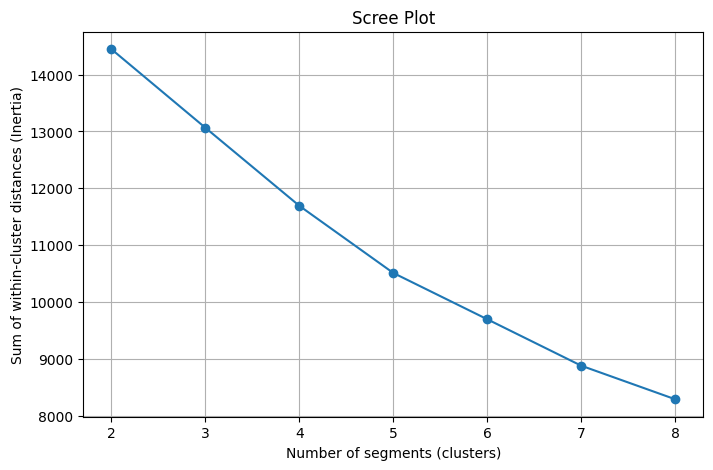

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample

# 1. Load your dataset
# Replace this with your real data import
# df = pd.read_csv('mcdonalds.csv')
# Example: Drop non-numeric columns if needed
X = mcdonalds.select_dtypes(include=np.number)

# 2. Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Run k-means for k=2 to k=8
def run_kmeans_multiple_k(X, k_range=range(2, 9), n_init=10):
    models = {}
    inertia = []
    for k in k_range:
        model = KMeans(n_clusters=k, n_init=n_init, random_state=1234)
        model.fit(X)
        models[k] = model
        inertia.append(model.inertia_)
    return models, inertia

kmeans_models, inertias = run_kmeans_multiple_k(X_scaled)

# 4. Plot the Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(2, 9), inertias, marker='o')
plt.xlabel('Number of segments (clusters)')
plt.ylabel('Sum of within-cluster distances (Inertia)')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

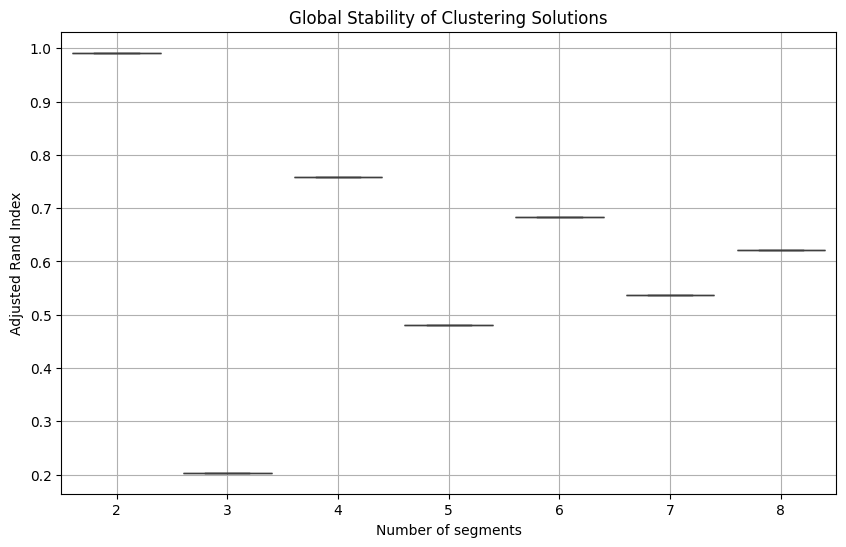

In [14]:
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
import seaborn as sns
import pandas as pd

def bootstrap_stability(X, k_range=range(2, 9), n_boot=100, n_init=10, random_state=1234):
    np.random.seed(random_state)
    stability_results = {k: [] for k in k_range}

    for k in k_range:
        orig_kmeans = KMeans(n_clusters=k, n_init=n_init, random_state=random_state).fit(X)
        orig_labels = orig_kmeans.labels_

        for _ in range(n_boot):
            X_boot = resample(X, replace=True, n_samples=len(X), random_state=random_state)
            boot_kmeans = KMeans(n_clusters=k, n_init=n_init, random_state=random_state).fit(X_boot)
            boot_labels = boot_kmeans.predict(X)  # Predict on original X
            score = adjusted_rand_score(orig_labels, boot_labels)
            stability_results[k].append(score)

    return stability_results

stability = bootstrap_stability(X_scaled)

# Convert to DataFrame for plotting
df_stability = pd.DataFrame([
    {'k': k, 'ARI': score} for k, scores in stability.items() for score in scores
])

plt.figure(figsize=(10, 6))
sns.boxplot(x='k', y='ARI', data=df_stability)
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Global Stability of Clustering Solutions")
plt.grid(True)
plt.show()
     

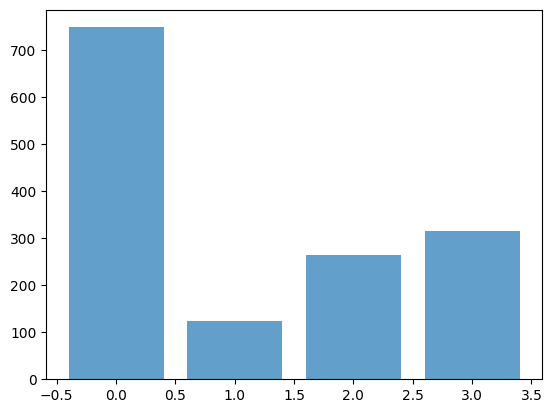

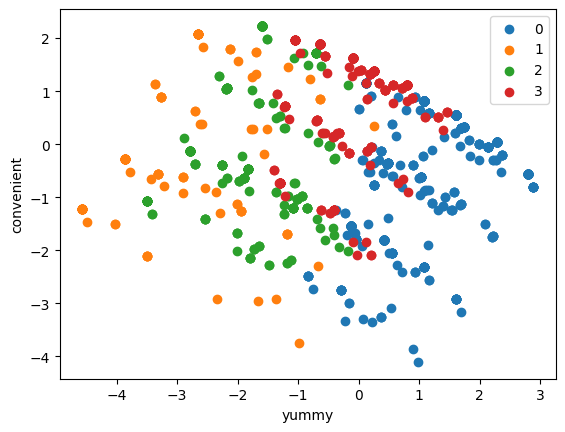

In [15]:
k = KMeans(n_clusters=4)
k.fit(pca_df)
l = k.predict(pca_df)

x = range(4)
height = []
for i in range(4):
    height.append(sum(l == i))
plt.bar(x, height, alpha=0.7);
plt.show()

for i in range(4):
    temp = pca_df[['yummy', 'convenient']][l == i]
    plt.scatter(
        temp['yummy'],
        temp['convenient'],
        label=i
    )
plt.xlabel('yummy')
plt.ylabel('convenient')
plt.legend();
plt.show()

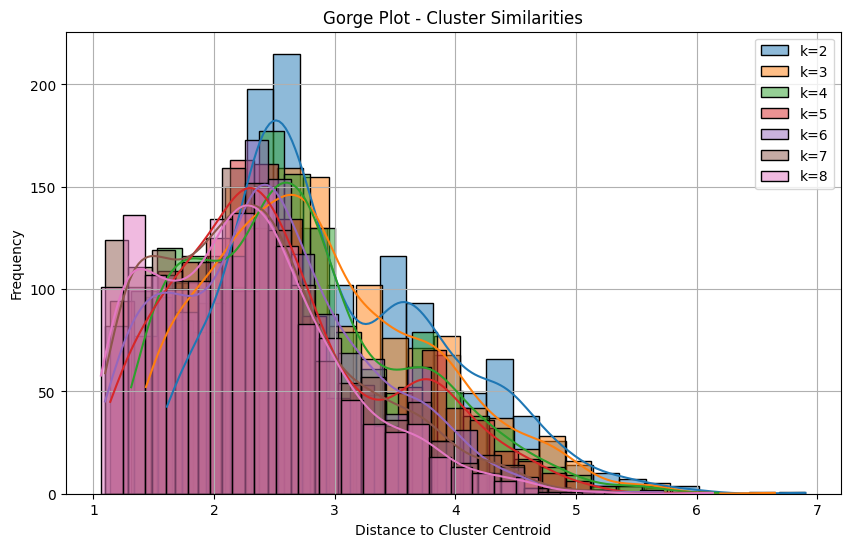

In [17]:
# prompt: generate the Gorge Plot - Cluster Similarities

# prompt: generate the Gorge Plot - Cluster Similarities

def calculate_gorge_plot_data(X_scaled, k_range=range(2, 9), n_init=10, random_state=1234):
    gorge_data = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, n_init=n_init, random_state=random_state).fit(X_scaled)
        distances = pairwise_distances_argmin_min(X_scaled, kmeans.cluster_centers_)[1]
        gorge_data.append({'k': k, 'distances': distances})
    return gorge_data

gorge_data = calculate_gorge_plot_data(X_scaled)

plt.figure(figsize=(10, 6))
for item in gorge_data:
    k = item['k']
    distances = item['distances']
    # Plot the distribution of distances for each k
    sns.histplot(distances, kde=True, label=f'k={k}', alpha=0.5)

plt.xlabel("Distance to Cluster Centroid")
plt.ylabel("Frequency")
plt.title("Gorge Plot - Cluster Similarities")
plt.legend()
plt.grid(True)
plt.show()
     


In [18]:
# prompt: generate the mutinonimal logistic regression

import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Assuming 'mcdonalds' dataframe is already loaded and processed

# Define the dependent variable (segment label) and independent variables
# We need to add the segment labels as a column to the original dataframe
mcdonalds['segment'] = l # Use the segment labels from the KMeans model (assuming 'l' holds the labels)

# Define the dependent variable (the segment column)
y = mcdonalds['segment']

# Define the independent variables (use the binary variables)
X = x_binary

# Split data into training and testing sets (optional but good practice)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

# Add a constant (intercept) to the independent variables
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the multinomial logistic regression model
# The response variable y should be a pandas Series of integer segment labels
# The exog (independent variables) should be a pandas DataFrame
mnlogit_model = sm.MNLogit(y_train, X_train)
mnlogit_fit = mnlogit_model.fit()

# Print the summary of the model
print(mnlogit_fit.summary())

# You can also make predictions on the test set
# y_pred = mnlogit_fit.predict(X_test)


Optimization terminated successfully.
         Current function value: nan
         Iterations 21
                          MNLogit Regression Results                          
Dep. Variable:                segment   No. Observations:                 1017
Model:                        MNLogit   Df Residuals:                      981
Method:                           MLE   Df Model:                           33
Date:                Wed, 28 May 2025   Pseudo R-squ.:                     nan
Time:                        22:38:06   Log-Likelihood:                    nan
converged:                       True   LL-Null:                       -1204.3
Covariance Type:            nonrobust   LLR p-value:                       nan
 segment=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        nan         nan         nan
yummy             nan        nan 

C:\Users\91789\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\discrete\discrete_model.py:3027: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
C:\Users\91789\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\discrete\discrete_model.py:3028: RuntimeWarning: invalid value encountered in divide
  return eXB/eXB.sum(1)[:,None]


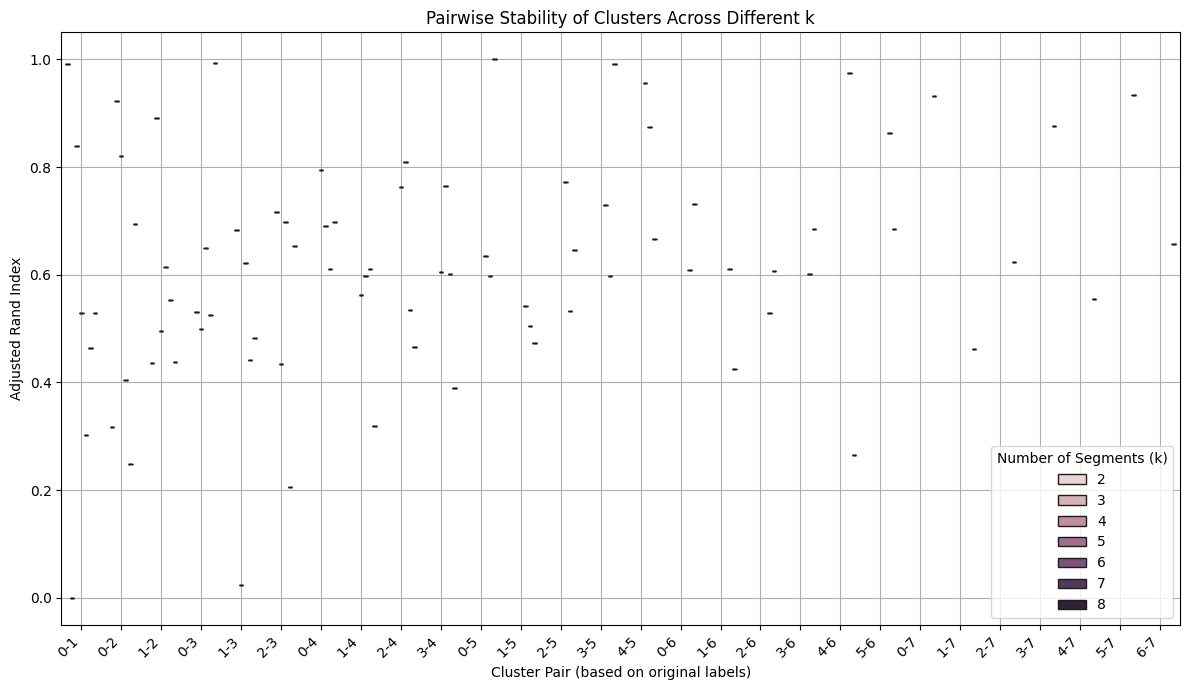

In [21]:
# prompt: generate the some visualizationa and validation graphs for undertstand market segementations

def bootstrap_stability_pairwise(X, k_range=range(2, 9), n_boot=100, n_init=10, random_state=1234):
    np.random.seed(random_state)
    pairwise_stability_results = {k: {} for k in k_range}

    for k in k_range:
        orig_kmeans = KMeans(n_clusters=k, n_init=n_init, random_state=random_state).fit(X)
        orig_labels = orig_kmeans.labels_

        for _ in range(n_boot):
            X_boot = resample(X, replace=True, n_samples=len(X), random_state=random_state)
            boot_kmeans = KMeans(n_clusters=k, n_init=n_init, random_state=random_state).fit(X_boot)
            boot_labels = boot_kmeans.predict(X) # Predict on original X

            # Calculate pairwise similarities within bootstrapped sample
            # using Adjusted Rand Index compared to original clusters
            for i in range(k):
                for j in range(i + 1, k):
                    # Select points belonging to cluster i and j in the original labels
                    subset_indices = np.where((orig_labels == i) | (orig_labels == j))[0]
                    if len(subset_indices) > 1:
                        # Get the corresponding labels from the bootstrapped prediction
                        subset_boot_labels = boot_labels[subset_indices]
                        subset_orig_labels = orig_labels[subset_indices]
                        score = adjusted_rand_score(subset_orig_labels, subset_boot_labels)

                        pair_key = tuple(sorted((i, j))) # Use sorted tuple for consistent key
                        if pair_key not in pairwise_stability_results[k]:
                            pairwise_stability_results[k][pair_key] = []
                        pairwise_stability_results[k][pair_key].append(score)

    return pairwise_stability_results

pairwise_stability = bootstrap_stability_pairwise(X_scaled)

# Convert to DataFrame for plotting pairwise stability
df_pairwise_stability = pd.DataFrame([
    {'k': k, 'pair': f'{p[0]}-{p[1]}', 'ARI': score}
    for k, pairs in pairwise_stability.items()
    for p, scores in pairs.items()
    for score in scores
])

# Plot the pairwise stability box plot
plt.figure(figsize=(12, 7))
sns.boxplot(x='pair', y='ARI', hue='k', data=df_pairwise_stability)
plt.xlabel("Cluster Pair (based on original labels)")
plt.ylabel("Adjusted Rand Index")
plt.title("Pairwise Stability of Clusters Across Different k")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Number of Segments (k)')
plt.tight_layout()
plt.grid(True)
plt.show()




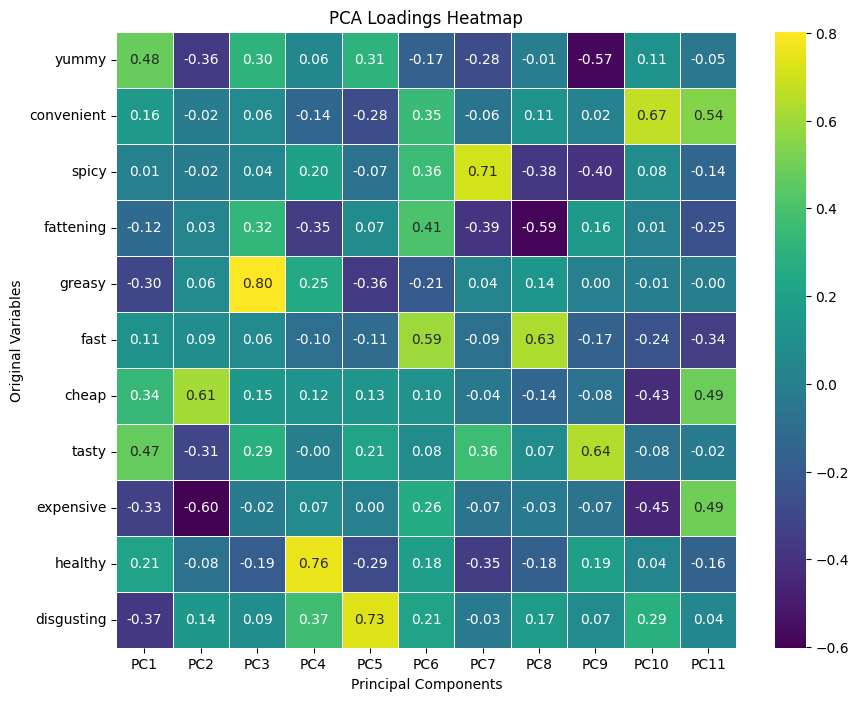

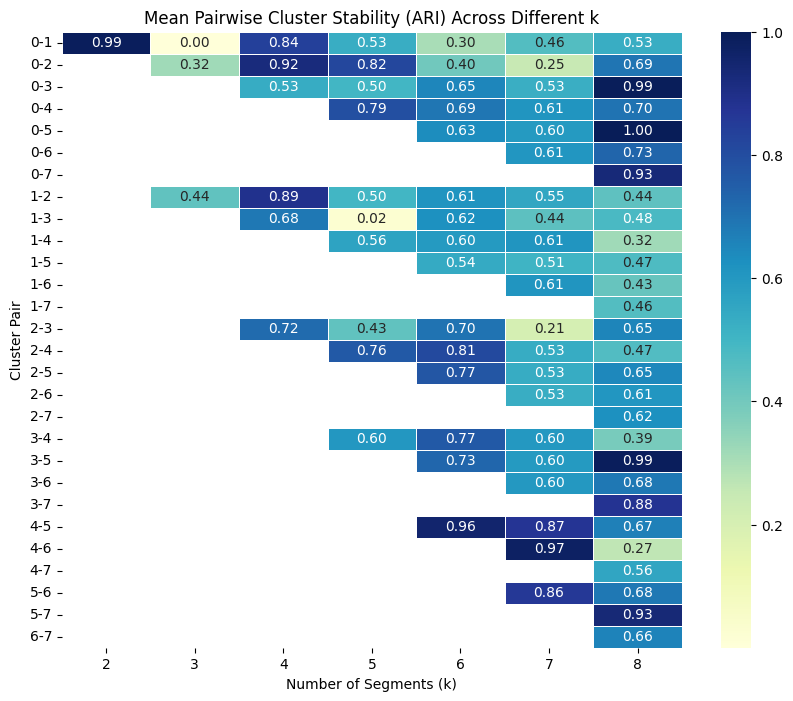

In [22]:
# prompt: generate the heatmaps

plt.figure(figsize=(10, 8))
sns.heatmap(loadings, annot=True, cmap="viridis", fmt=".2f", linewidths=.5)
plt.title("PCA Loadings Heatmap")
plt.xlabel("Principal Components")
plt.ylabel("Original Variables")
plt.show()

# Heatmap for pairwise similarity (Adjusted Rand Index) from bootstrap
# We'll calculate the mean ARI for each pair for each k
mean_pairwise_ari = df_pairwise_stability.groupby(['k', 'pair'])['ARI'].mean().reset_index()

# Pivot the data to create a matrix for the heatmap
pivot_mean_ari = mean_pairwise_ari.pivot(index='pair', columns='k', values='ARI')

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_mean_ari, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5)
plt.title("Mean Pairwise Cluster Stability (ARI) Across Different k")
plt.xlabel("Number of Segments (k)")
plt.ylabel("Cluster Pair")
plt.show()

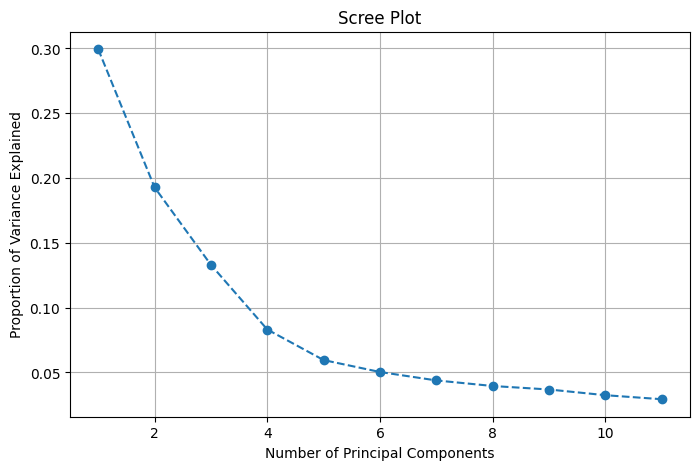

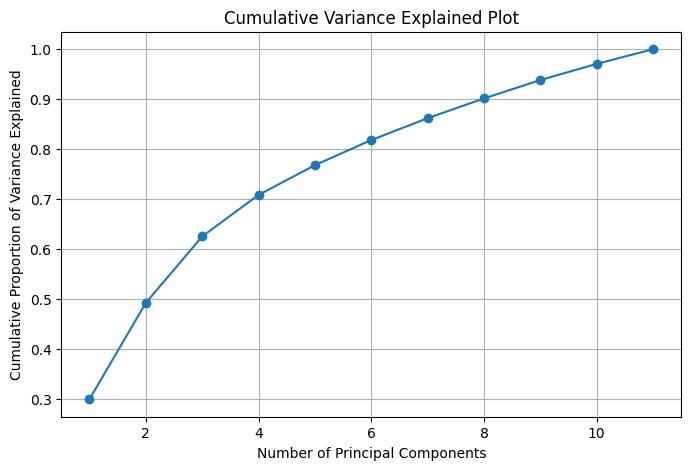

In [23]:
# prompt: generate the Scree Plot

# Assuming 'explained_variance' is already calculated from the PCA step

# Plot the Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

# Plot Cumulative Variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.title('Cumulative Variance Explained Plot')
plt.grid(True)
plt.show()